In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns',None)

In [6]:
df = pd.read_csv("data/Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [8]:
df['balcony'].corr(df['price'])

0.1203553093806771

In [9]:
df.drop(columns=['area_type','availability','society','balcony'],axis=1,inplace=True)

In [10]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


#### Null values

In [11]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [13]:
df.dropna(inplace=True)

In [14]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

##### Create bhk column for bringing size column into uniformity

In [15]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [16]:
df['bhk'] = df['size'].apply(lambda x:int(x.split(' ')[0]))

In [17]:
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [18]:
df.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [19]:
df[df['bhk']>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


##### Convert total_sqft from object to float

In [20]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [21]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [22]:
df[~df['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [23]:
df[~df['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


##### Some values in total_sqft column are range values and some contain string in them, transform them to float values

In [24]:
def convert_sqft_num(x):
    tokens = x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [25]:
df['total_sqft'] = df['total_sqft'].apply(convert_sqft_num)
df.head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [26]:
df.isnull().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

##### Add a column price_per_sqft using total_sqft and price columns

In [27]:
df['price_per_sqft'] = (df['price']*100000)/df['total_sqft']
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [28]:
len(df['location'].unique())

1304

##### Remove location where the data points of the location are less than 10

In [29]:
locations_count = df.groupby('location')['location'].agg('count').sort_values(ascending=False)
locations_count

location
Whitefield             534
Sarjapur  Road         392
Electronic City        302
Kanakpura Road         266
Thanisandra            233
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1304, dtype: int64

In [30]:
len(locations_count[locations_count<10])

1051

In [31]:
col_name = locations_count[locations_count<10].index
col_name

Index(['Kamakshipalya', 'Kaverappa Layout', 'Yemlur', 'Sector 1 HSR Layout',
       '4th Block Koramangala', 'Mathikere', 'Chandra Layout',
       'Jakkur Plantation', 'Volagerekallahalli', 'Vignana Nagar',
       ...
       'KPC Layout', 'Kalasipalya', 'Kalhalli', 'Kalkere Channasandra',
       'Kamdhenu Nagar', ' Banaswadi', 'Kanakadasa Layout',
       'Kanakapur main road', 'Kanakapura  Rod', 'whitefiled'],
      dtype='object', name='location', length=1051)

In [32]:
df['location'] = df['location'].replace(col_name,'others')

In [33]:
len(df['location'].unique())

254

In [34]:
df.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
8708,Harlur,2 BHK,1532.0,2.0,65.0,2,4242.819843
4579,Seegehalli,4 BHK,3000.0,5.0,150.0,4,5000.000000
7253,Marathahalli,2 BHK,1196.0,2.0,57.9,2,4841.137124
8425,Kammanahalli,4 Bedroom,2900.0,4.0,200.0,4,6896.551724
5553,others,2 BHK,850.0,2.0,35.0,2,4117.647059
10184,others,3 BHK,1864.0,3.0,115.0,3,6169.527897
364,Hennur,2 BHK,1075.0,2.0,52.0,2,4837.209302
2431,EPIP Zone,4 BHK,3035.0,5.0,200.0,4,6589.785832
8263,Hennur,2 BHK,1255.0,2.0,55.5,2,4422.310757
13176,Channasandra,2 BHK,1010.0,2.0,32.0,2,3168.316832


#### Outliers


In [35]:
df[df.total_sqft/df.bhk<300]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,others,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,others,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,others,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,others,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,others,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [36]:
df = df[~(df.total_sqft/df.bhk<300)]

In [37]:
df.shape

(12502, 7)

In [38]:
df['price_per_sqft'].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

<AxesSubplot:xlabel='price_per_sqft', ylabel='Count'>

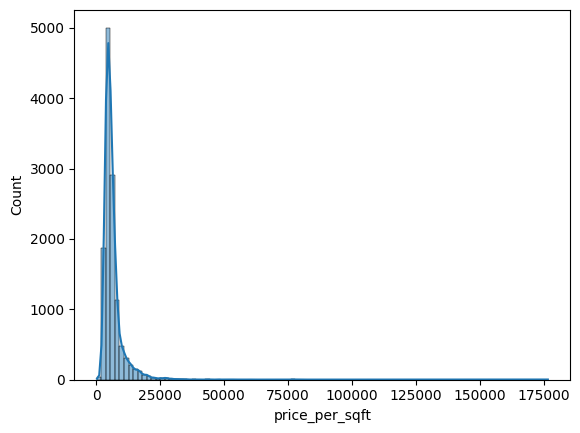

In [39]:
sns.histplot(df['price_per_sqft'],kde=True,bins=100)

In [40]:
def remove_outliers(df):
    df_out = pd.DataFrame()
    for loc,frame in df.groupby('location'):
        mean = np.mean(frame['price_per_sqft'])
        std = np.std(frame['price_per_sqft'])
        reduced_df = frame[(frame['price_per_sqft']>=(mean-std)) & (frame['price_per_sqft']<=(mean+std))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [41]:
df = remove_outliers(df)
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Devarachikkanahalli,3 BHK,1250.0,2.0,44.0,3,3520.000000
1,Devarachikkanahalli,2 BHK,1250.0,2.0,40.0,2,3200.000000
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.0,2,6916.666667
3,Devarachikkanahalli,2 BHK,1170.0,2.0,40.0,2,3418.803419
4,Devarachikkanahalli,3 BHK,1425.0,2.0,65.0,3,4561.403509


In [42]:
df.shape

(10226, 7)

<AxesSubplot:xlabel='price_per_sqft', ylabel='Count'>

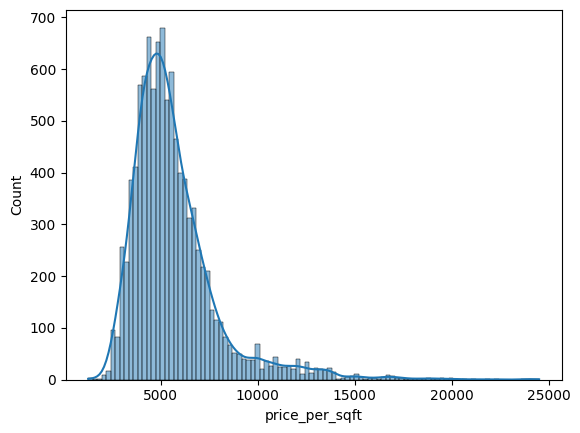

In [43]:
sns.histplot(df['price_per_sqft'],kde=True,bins=100)

In [44]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.figure(figsize=(10,5))
    plt.scatter(bhk2.total_sqft,bhk2.price,color='red',label='2 BHK')
    plt.scatter(bhk3.total_sqft,bhk3.price,color='blue',label='3 BHK')
    plt.xlabel('Price')
    plt.ylabel('Total_sqft')
    plt.legend()

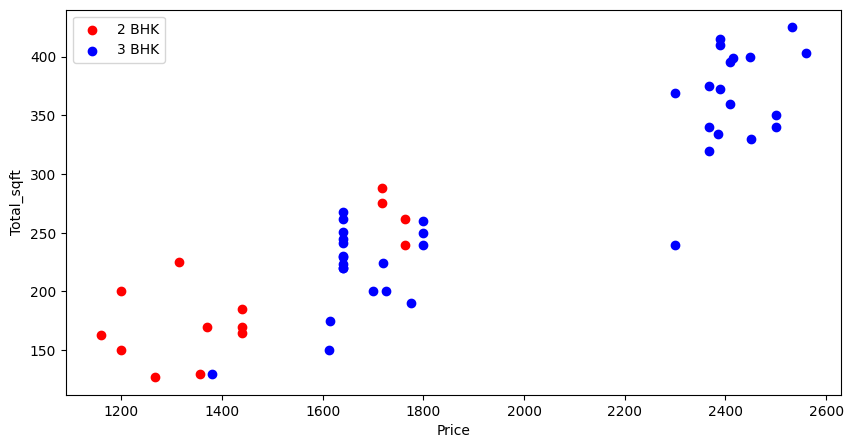

In [45]:
plot_scatter_chart(df,'Rajaji Nagar')

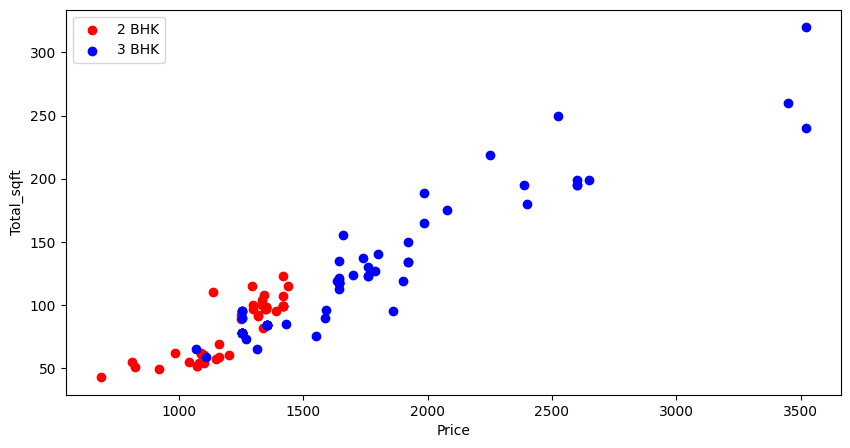

In [46]:
plot_scatter_chart(df,'Hebbal')

##### Insights : From above plot we can know that some of the 2 BHK houses are more priced than 3 BHK houses even though having almost same sqft of area

In [47]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for loc,location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')


In [48]:
df = remove_bhk_outliers(df)
df.shape

(7380, 7)

##### After removing BHK outliers

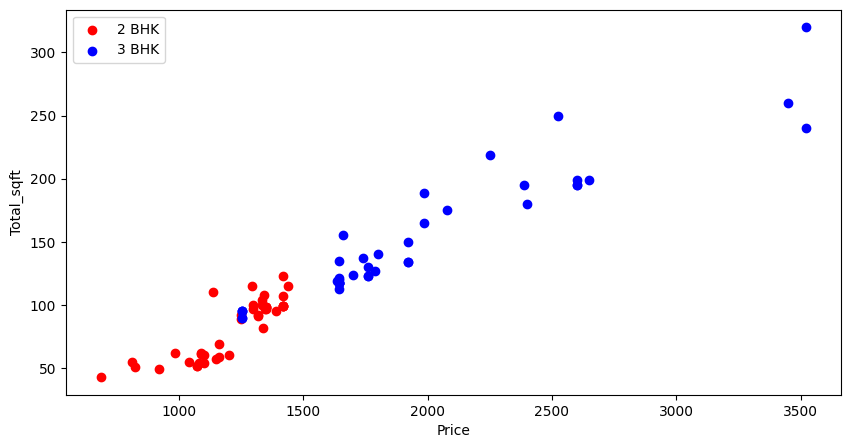

In [49]:
plot_scatter_chart(df,'Hebbal')

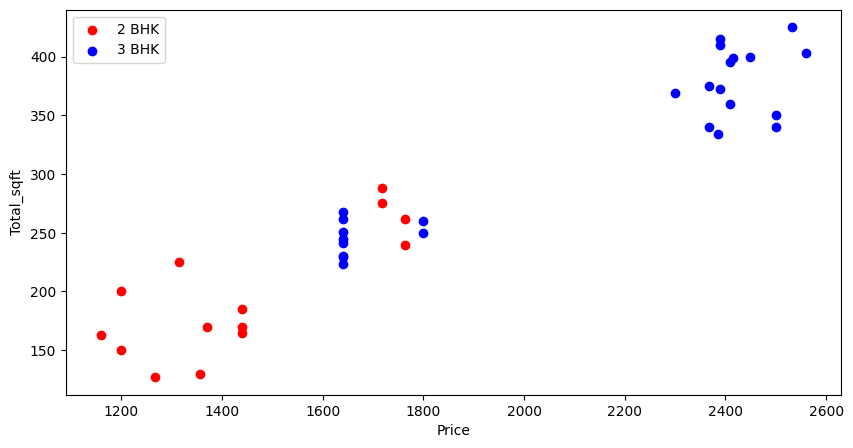

In [50]:
plot_scatter_chart(df,'Rajaji Nagar')

Text(0, 0.5, 'Counts')

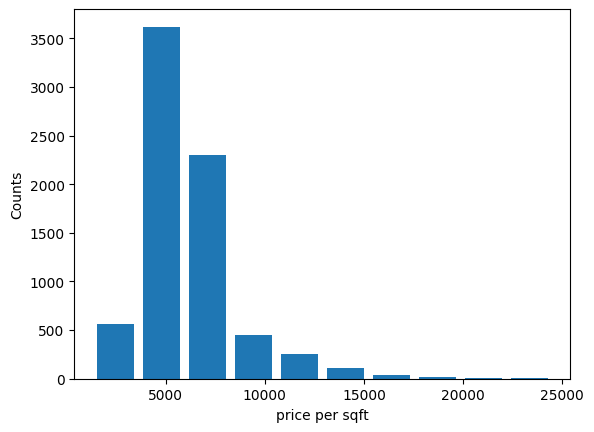

In [51]:
plt.hist(df['price_per_sqft'],rwidth=0.8)
plt.xlabel('price per sqft')
plt.ylabel('Counts')

In [52]:
df.bath.unique()

array([ 2.,  3.,  4.,  5.,  8.,  1.,  6., 14.,  7.,  9., 12., 16., 13.])

In [53]:
df[df.bath>df.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
597,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
1653,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5299,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6776,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8465,others,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [54]:
df = df[~(df.bath>df.bhk+2)]
df.shape

(7375, 7)

In [55]:
df.drop(['size','price_per_sqft'],axis=1,inplace=True)

In [56]:
df.head()

,location,total_sqft,bath,price,bhk
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,40.0,2
4,Devarachikkanahalli,1425.0,2.0,65.0,3
5,Devarachikkanahalli,947.0,2.0,43.0,2


In [59]:
df.to_csv("data/cleaned_data.csv",index=False,header=True)